<a href="https://colab.research.google.com/github/AZhytnyk/DZ_DLA/blob/main/HW3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

/tmp/ipython-input-12-1571246957.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


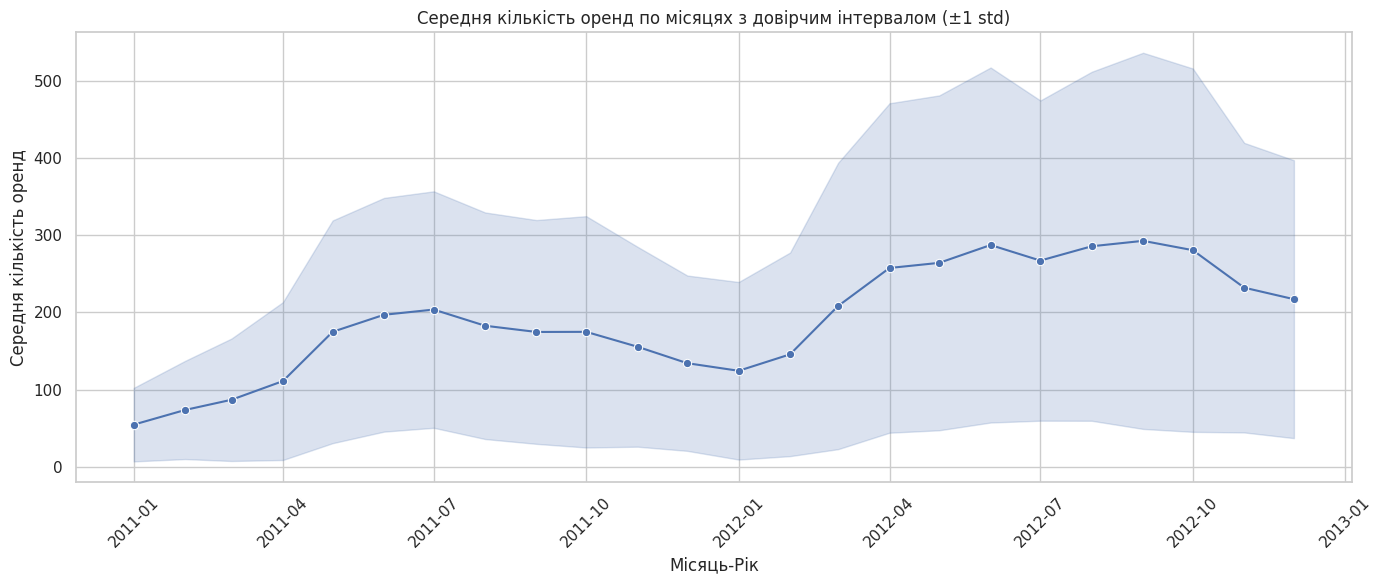

In [12]:
# Створення колонки "місяць-рік"
df['month_year'] = df.index.to_period('M')
df['month_year'] = df['month_year'].astype(str)

# Додаткова колонка для правильного сортування по даті
df['month_year_start'] = df.index.to_period('M').to_timestamp()

# Побудова графіка
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df,
    x='month_year_start',
    y='count',
    estimator='mean',
    ci='sd',           # довірчий інтервал = 1 стандартне відхилення
    marker='o'
);

# Оформлення
plt.title('Середня кількість оренд по місяцях з довірчим інтервалом (±1 std)')
plt.xlabel('Місяць-Рік')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Знову, як і у минулій домашці, не допомагає plt.show() або ; після форматування графіка - все-одно з'являється зайвий текст над графіком.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

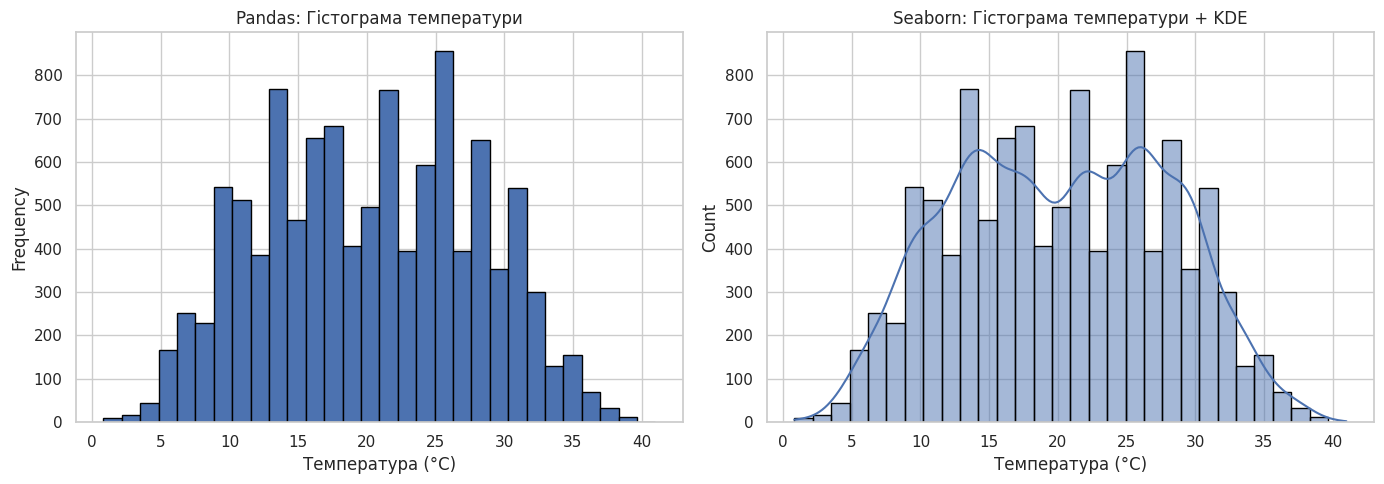

In [11]:
# Кількість бінів
bins = 30  # не стандартні 10 — задаємо вручну

# Гістограма з Pandas
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
df['temp'].plot.hist(bins=bins, edgecolor='black')
plt.title('Pandas: Гістограма температури')
plt.xlabel('Температура (°C)');

# Гістограма з Seaborn + KDE
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='temp', bins=bins, kde=True, edgecolor='black')
plt.title('Seaborn: Гістограма температури + KDE')
plt.xlabel('Температура (°C)');

plt.tight_layout()
plt.show()


Pandas просто показує стовпчики (без згладження).

Seaborn додає ще й гладку криву розподілу (KDE), тому виглядає плавніше.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

<Figure size 800x500 with 0 Axes>

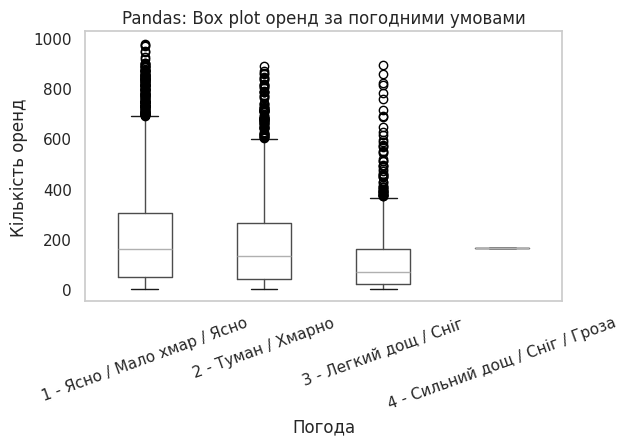

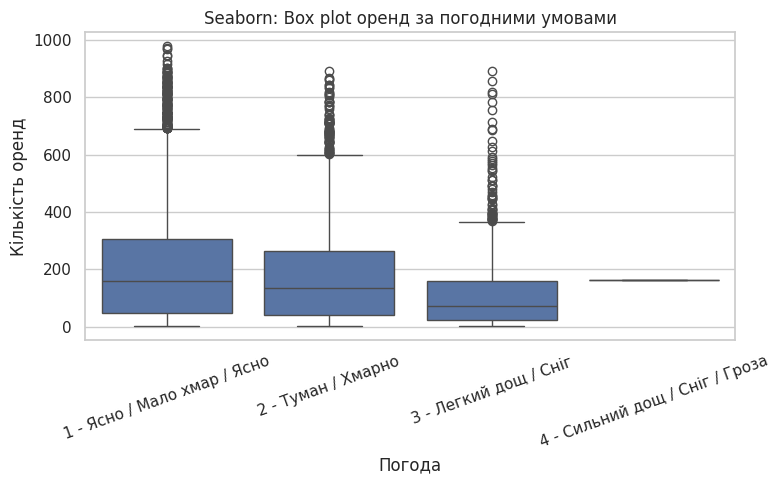

In [13]:
# Додамо текстові мітки для погодних умов
weather_labels = {
    1: '1 - Ясно / Мало хмар / Ясно',
    2: '2 - Туман / Хмарно',
    3: '3 - Легкий дощ / Сніг',
    4: '4 - Сильний дощ / Сніг / Гроза'
}
df['weather_label'] = df['weather'].map(weather_labels)

# Побудова Pandas boxplot
plt.figure(figsize=(8, 5))
df.boxplot(column='count', by='weather_label', grid=False)
plt.title('Pandas: Box plot оренд за погодними умовами')
plt.suptitle('')  # Прибираємо зайвий заголовок
plt.xlabel('Погода')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Побудова Seaborn boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='weather_label', y='count')
plt.title('Seaborn: Box plot оренд за погодними умовами')
plt.xlabel('Погода')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Другий графік явно краще сприймається, легше читається та інформативніший.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


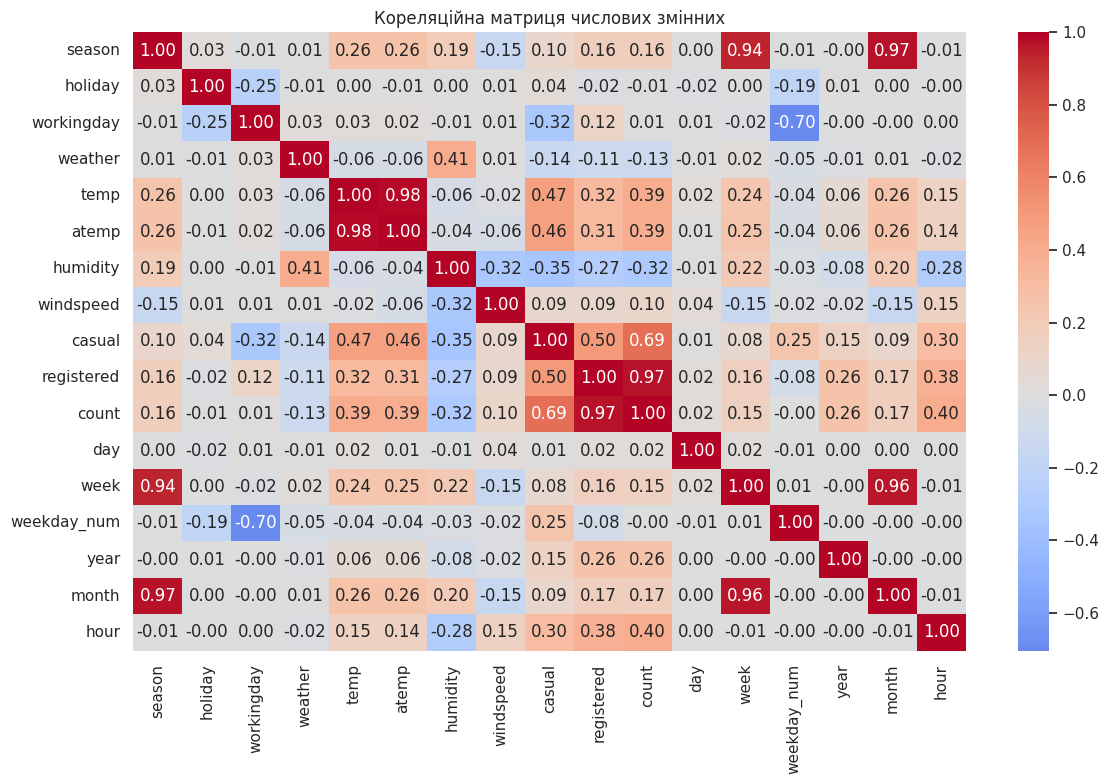

In [15]:
# Вибір лише числових змінних
numeric_df = df.select_dtypes(include='number')

# Обчислення кореляційної матриці
corr_matrix = numeric_df.corr()

# Побудова heatmap з анотаціями
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Кореляційна матриця числових змінних')
plt.tight_layout()
plt.show()

 Аналіз графіка:
1. Які змінні найсильніше корелюють з count (загальна кількість оренд)?

Висновок: registered найбільше корелює з count, бо count = casual + registered

2. Чому висока кореляція між temp та atemp?

atemp — це "як температура відчувається", тому майже прямо залежить від temp (вони близькі за суттю).

3. Які змінні мають негативну кореляцію?

humidity та count → слабка негативна кореляція (наприклад, -0.3)

windspeed і count → можливо теж негативна або майже нульова

Зростання вологості і вітру — трохи зменшує кількість оренд.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


/tmp/ipython-input-21-1099860001.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='season_label', y='count', inner='box', palette='Set2');


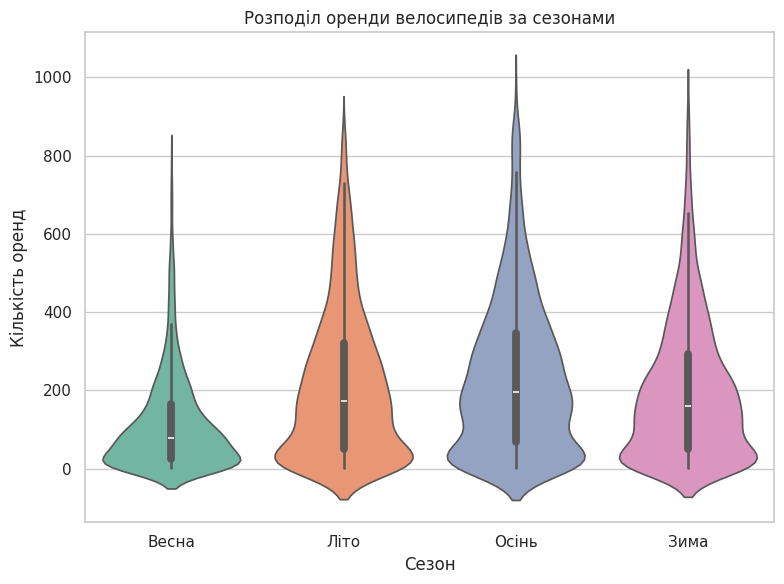

In [21]:
# Словник назв сезонів
season_labels = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
}
df['season_label'] = df['season'].map(season_labels)

# Побудова violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='season_label', y='count', inner='box', palette='Set2')
plt.title('Розподіл оренди велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд');
plt.tight_layout()
plt.show()


Всередині фігури — вузький boxplot, зовні — "форма" розподілу

Товщина (ширина) вказує на щільність розподілу значень:

Товсто = багато значень у цьому діапазоні

Тонко = мало значень

Найбільша варіабельність - восени.

 Перевага violin plot: можна побачити форму розподілу, симетрію, піки тощо — те, що boxplot приховує.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

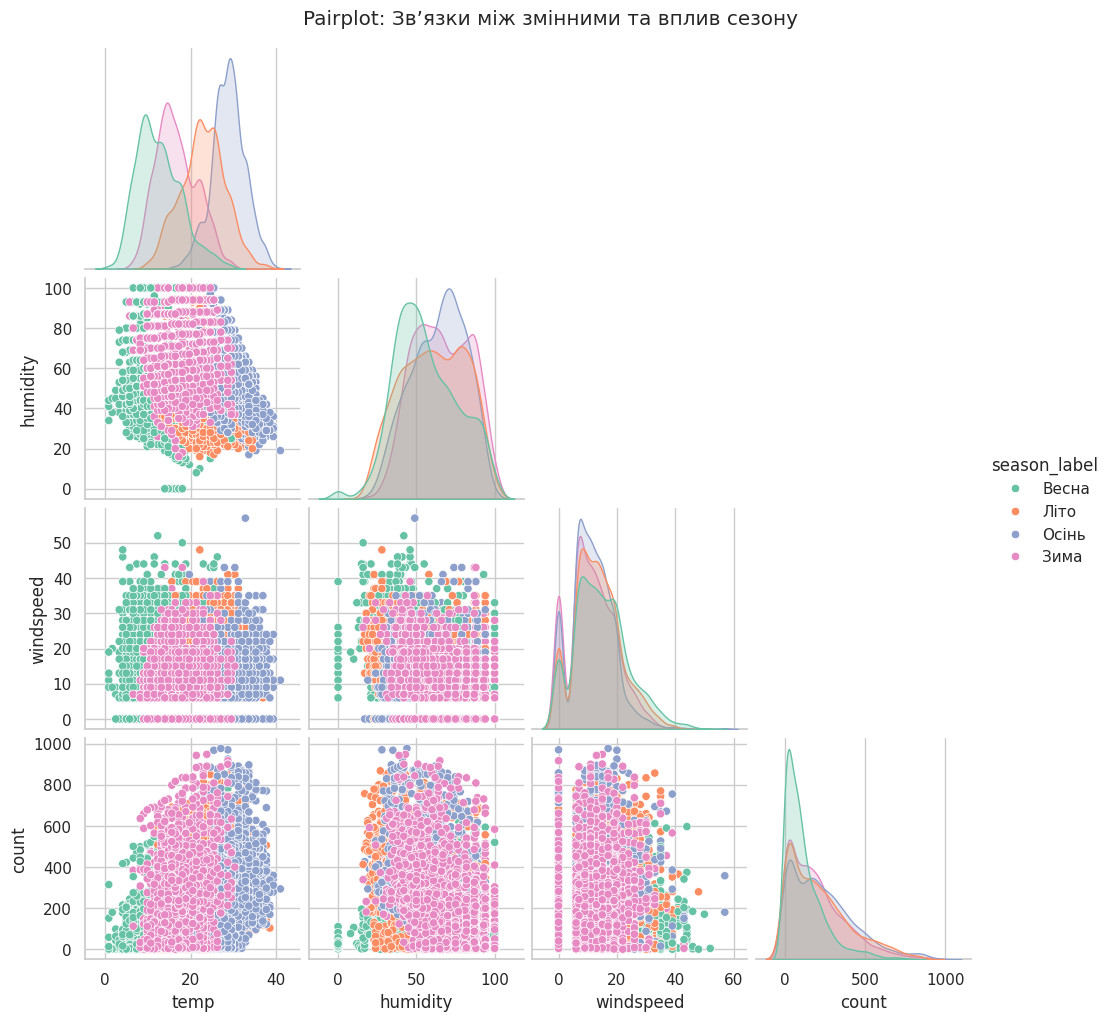

In [20]:
# Вибір змінних
selected_cols = ['temp', 'humidity', 'windspeed', 'count', 'season_label']

# Побудова pairplot
sns.pairplot(df[selected_cols], hue='season_label', corner=True, palette='Set2')
plt.suptitle('Pairplot: Зв’язки між змінними та вплив сезону', y=1.02)
plt.show()

Найбільш чітка лінійна залежність — між temp і count:

Вищі температури → більше оренд.

Найбільші сезонні зміни спостерігаються в temp (температурі)


## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

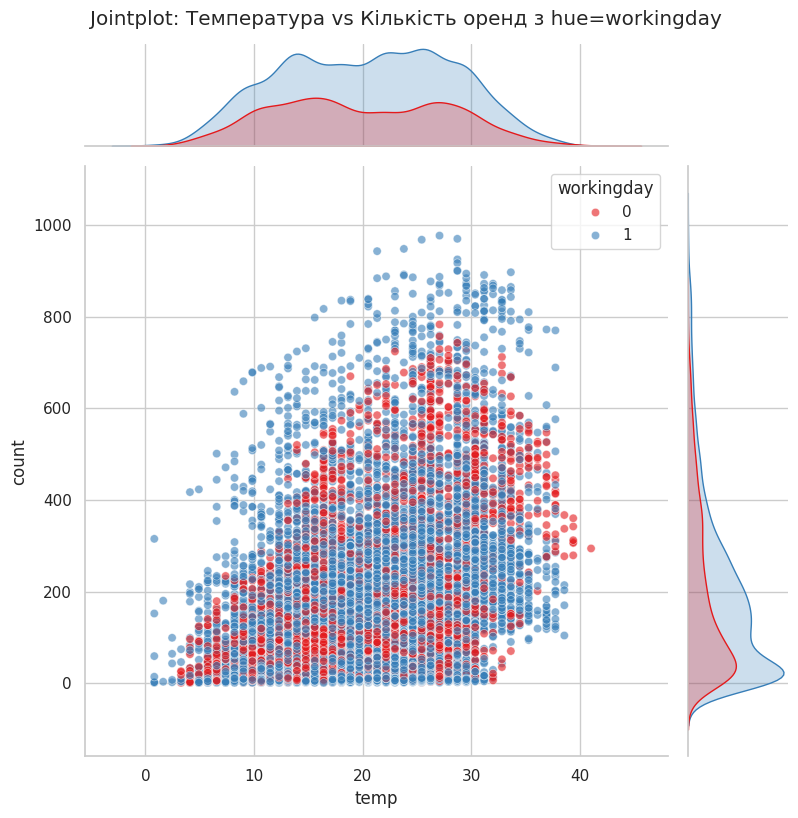

In [22]:
# Побудова графіка
sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday',
    kind='scatter',
    palette='Set1',
    height=8,
    alpha=0.6
)

plt.suptitle('Jointplot: Температура vs Кількість оренд з hue=workingday', y=1.02)
plt.show()


Верхній графік (по осі x) — це розподіл температури.

Бічний графік (по осі y) — це розподіл кількості оренд.

Вони розбиті на дві групи:

workingday=1 (робочий день)

workingday=0 (вихідний/святковий)

Ці графіки дозволяють порівняти, як температура і кількість оренд розподіляються в кожній категорії.


Помітна різниця у поведінці користувачів:

У робочі дні (workingday=1):

Більше оренд при середніх температурах (пік у ~20–30°C)

Розподіл кількості оренд вищий загалом, бо їздять на роботу

У неробочі дні (workingday=0):

Оренди також зростають із температурою, але нижчі за рівнем

Більше оренд при вищих температурах, бо люди катаються для розваги